In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [28]:
dataset = pd.read_csv('dataset/Example_AP.csv')
dataset.head()

,Rank,Correct,Precision,Recall
0,1,True,1.00,0.2
1,2,True,1.00,0.4
2,3,False,0.67,0.4
3,4,False,0.50,0.4
4,5,False,0.40,0.4


dataset.show()

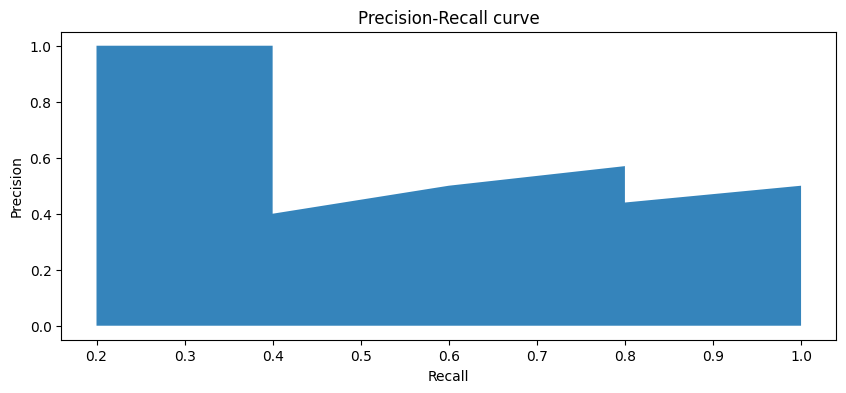

In [29]:
import matplotlib.pyplot as plt

def plot_static_precision_recall_curve(fpr, tpr):
    plt.figure(figsize=[10,4])
    plt.fill_between(fpr, tpr, alpha=.9)
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.title("Precision-Recall curve");
    plt.show()
    
plot_static_precision_recall_curve(dataset['Recall'], dataset['Precision'])

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in

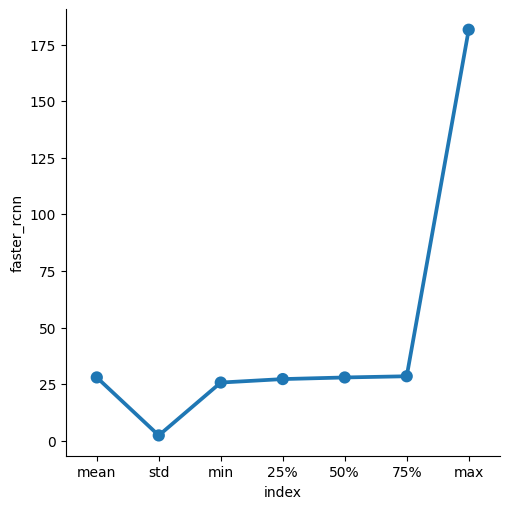

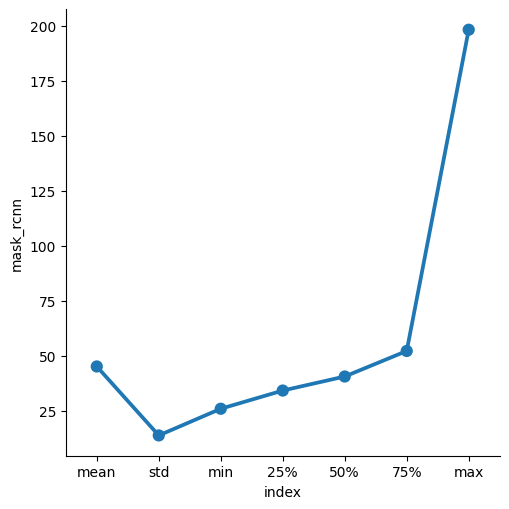

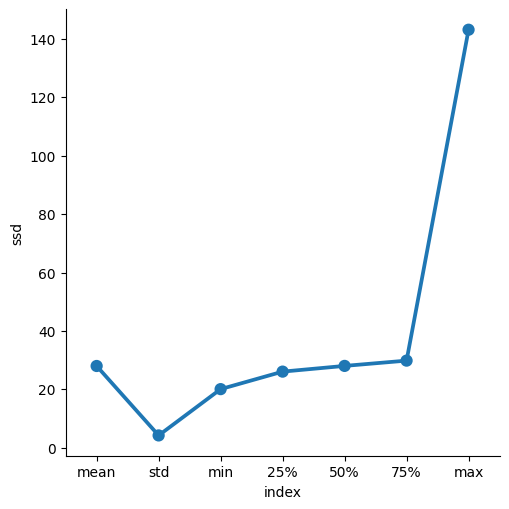

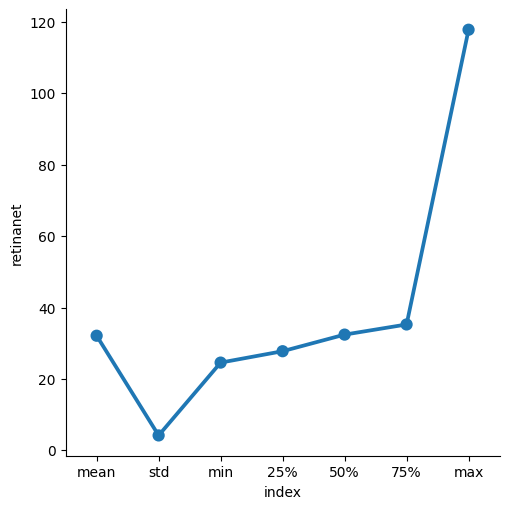

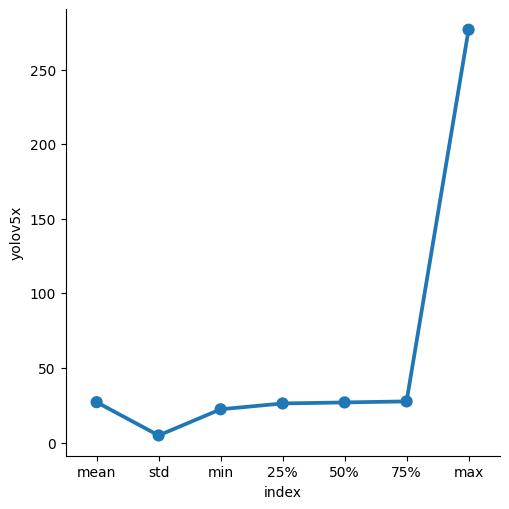

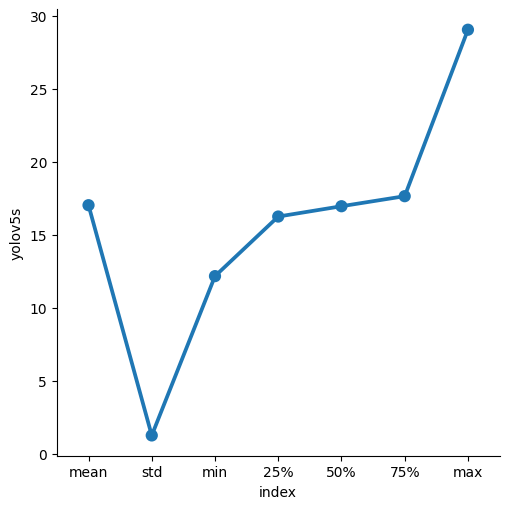

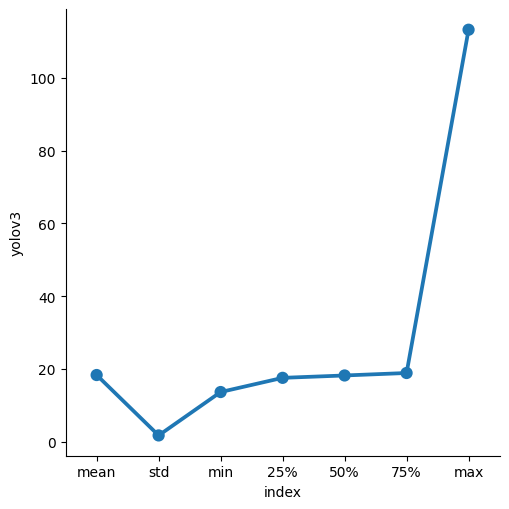

In [33]:
gpu_stats = pd.read_json('stats/A100/stats_A100.json')
yolov3_stats = pd.read_json('stats/A100/stats_A100_yoloV3.json')

final_df = pd.concat([gpu_stats, yolov3_stats], axis=1)
final_df.head()
final_df.describe().drop(columns=['name'])
describe_num_df = final_df.describe().drop(columns=['name'])
describe_num_df.reset_index(inplace=True)

describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in describe_num_df.columns:
  if i in ['index']:
    continue
  sns.factorplot(x="index", y=i, data=describe_num_df)
plt.show()

In [59]:
final_df = pd.concat([gpu_stats, yolov3_stats], axis=1)
df = final_df.describe().drop("name", axis=1)
df = df.transpose().drop("count", axis=1)
df['algorithm'] = df.index
df
df_melted = pd.melt(df, id_vars=['algorithm'], value_vars=['mean', 'std','min','25%','50%','75%','max'])
df_melted

,algorithm,variable,value
0,faster_rcnn,mean,27.977775
1,mask_rcnn,mean,45.391321
2,ssd,mean,28.002888
3,retinanet,mean,32.102508
4,yolov5x,mean,27.104188
5,yolov5s,mean,17.016782
6,yolov3,mean,18.461166
7,faster_rcnn,std,2.357576
8,mask_rcnn,std,14.058423
9,ssd,std,4.224209


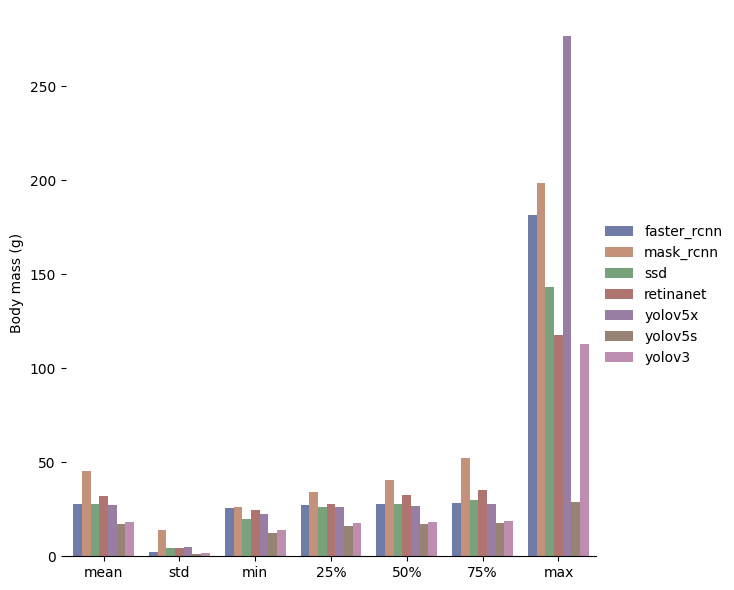

In [69]:
#sns.lineplot(data=df.transpose(), dashes=False, markers=True)
#plt.show()

sns.color_palette("husl", 9)

g = sns.catplot(
    data=df_melted, kind="bar",
    x="variable", y="value", hue="algorithm",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

plt.show()

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


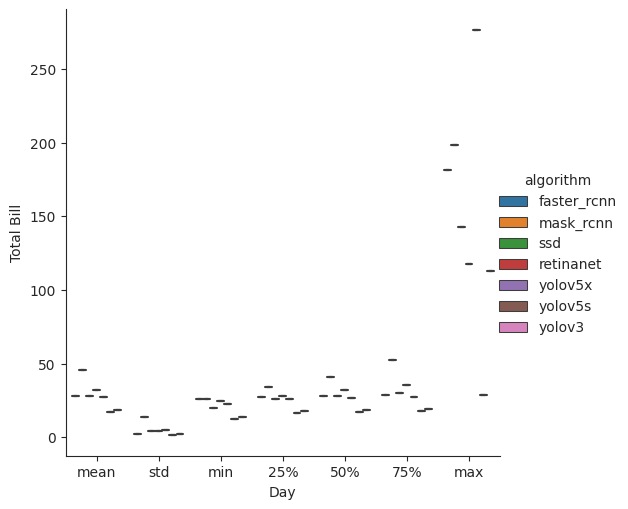

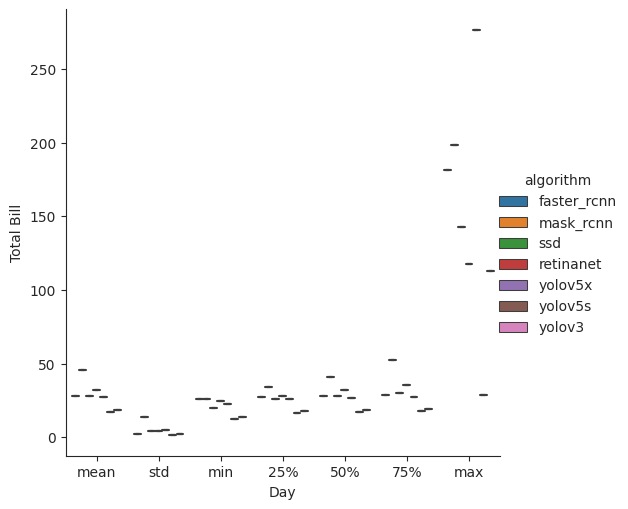

In [71]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("variable", "value", "algorithm", data=df_melted, kind="box")
    g.set_axis_labels("Day", "Total Bill");

plt.show()

In [6]:
df = pd.read_csv('eval/algorithmComparison_V100.csv')

In [9]:

sns.relplot(x="Inference", y="AP", data=df, hue="Algorithm", s=500)
sns.set(style="ticks")
plt.grid()
plt.xlabel('Inference Speed in ms (GPU)')
plt.ylabel('mAP')
plt.xlim(0, 100)
plt.ylim(0, 60)

# add annotations one by one with a loop
for line in range(0,df.shape[0]):
     plt.text(df.Inference[line]-10, df.AP[line]+2, df.Algorithm[line], horizontalalignment='left', size='medium', color='black', weight='regular')

plt.show()

NameError: name 'df' is not defined

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


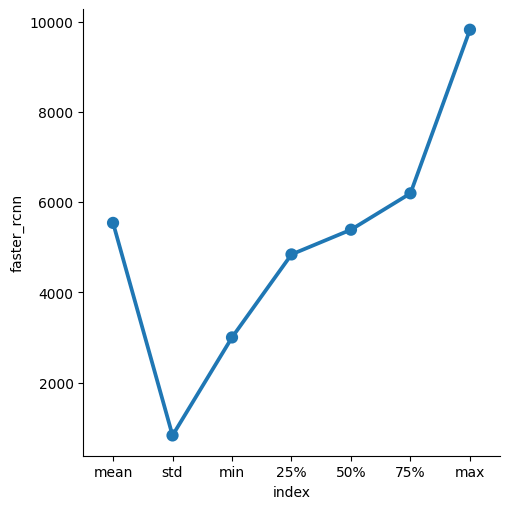

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


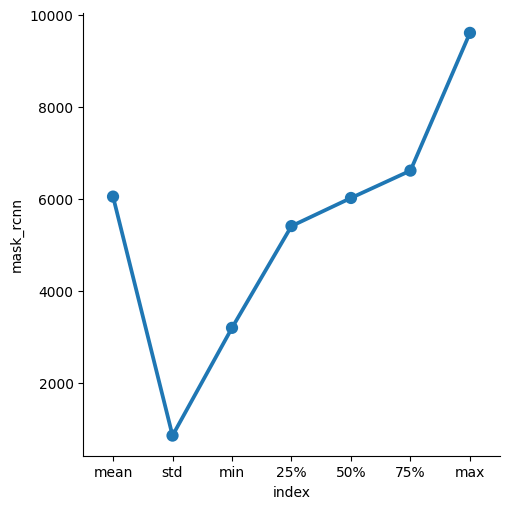

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


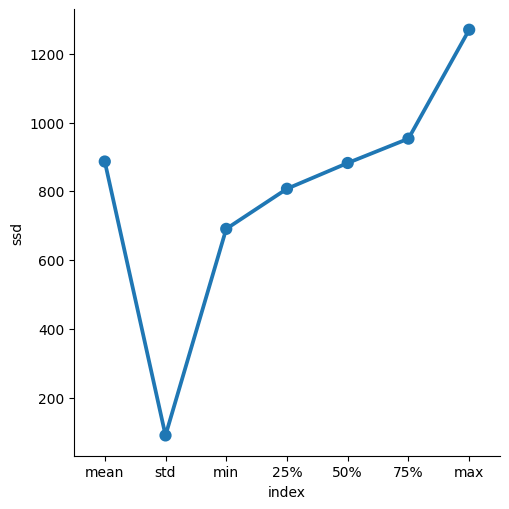

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


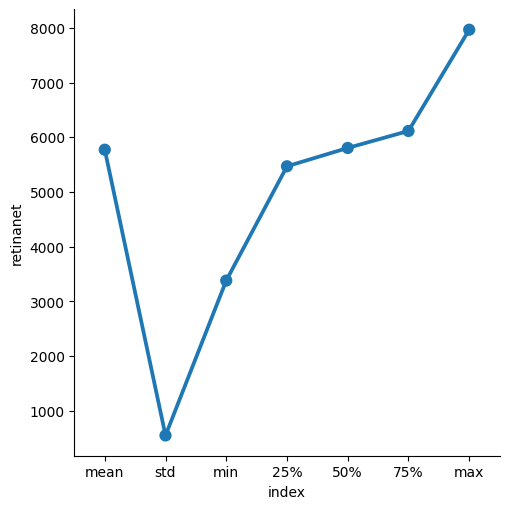

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


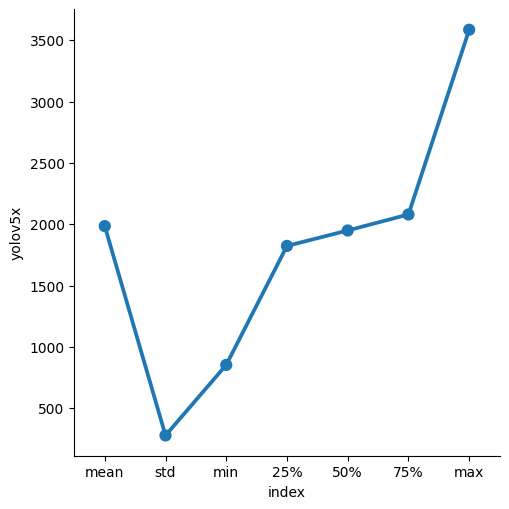

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


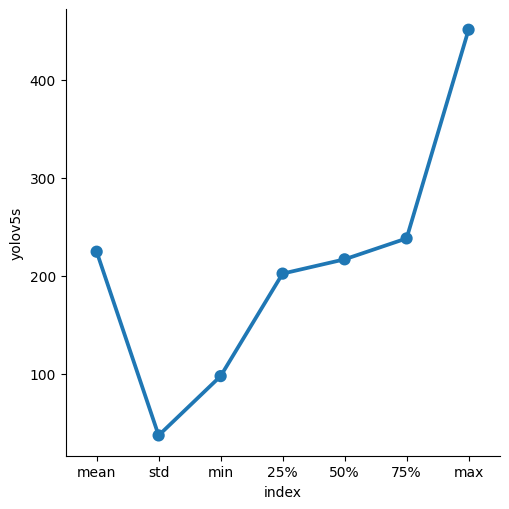

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


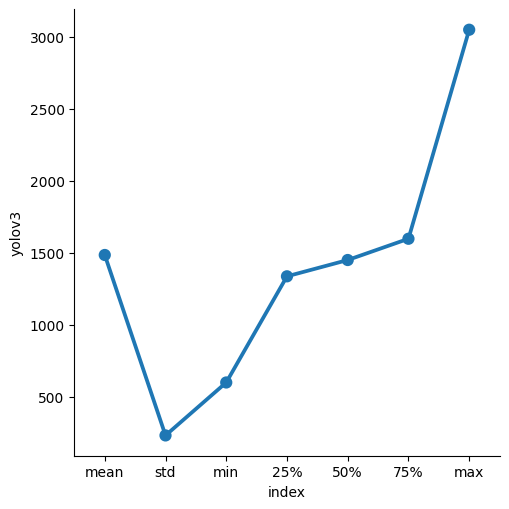

In [2]:
cpu_stats = pd.read_json('stats/stats.json') * 1000

cpu_stats.describe().drop(columns=['name'])
describe_num_df = cpu_stats.describe().drop(columns=['name'])
describe_num_df.reset_index(inplace=True)

describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in describe_num_df.columns:
  if i in ['index']:
    continue
  sns.factorplot(x="index", y=i, data=describe_num_df)
  plt.show()

In [3]:
describe_num_df

,index,faster_rcnn,mask_rcnn,ssd,retinanet,yolov5x,yolov5s,yolov3
1,mean,5541.728803,6055.892838,887.005085,5773.106257,1985.802101,224.549901,1487.142682
2,std,831.848136,866.910014,90.250732,551.619576,279.839042,37.138131,233.415443
3,min,3003.654003,3206.136227,691.111803,3381.622076,854.799986,97.645044,601.361036
4,25%,4843.158305,5416.142762,807.803094,5469.782829,1824.585497,202.192187,1338.954270
5,50%,5390.888095,6026.223302,882.754445,5804.994106,1950.428009,216.768026,1452.240944
6,75%,6196.834743,6619.927764,953.544199,6115.416467,2080.921948,238.110602,1599.908352
7,max,9822.247982,9610.876083,1270.352840,7965.375900,3586.565971,450.956106,3052.215099
